In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")

In [2]:
class LogParser:
    def __init__(self, csv, nrows):
        self.df = pd.read_csv(csv, nrows=nrows)
    
    @property
    def score(self):
        return self.df["score"].values
    
    @property
    def reward(self):
        return self.df["reward"].values
    
    def _avg(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.average(vals, axis=1)
    
    def _max(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.max(vals, axis=1)
    
    def avg_score(self, epoch):
        return self._avg(self.score, epoch)
    
    def avg_reward(self, epoch):
        return self._avg(self.reward, epoch)


## Learning rate

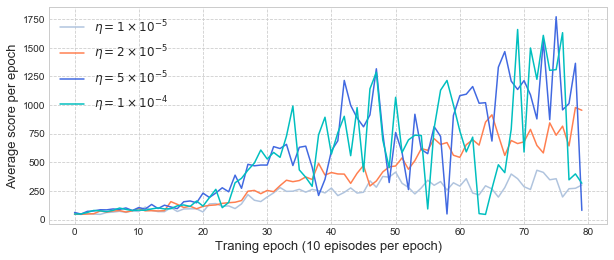

In [3]:
nrows = 800
lr1 = LogParser("../experiments/tune/lr_1e-5.csv", nrows)
lr2 = LogParser("../experiments/tune/lr_2e-5.csv", nrows)
lr3 = LogParser("../experiments/tune/lr_5e-5.csv", nrows)
lr4 = LogParser("../experiments/tune/lr_1e-4.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(lr1.avg_score(10), label=r'$\eta=1\times 10^{-5}$', color='lightsteelblue')
plt.plot(lr2.avg_score(10), label=r'$\eta=2\times 10^{-5}$', color='coral')
plt.plot(lr3.avg_score(10), label=r'$\eta=5\times 10^{-5}$', color='royalblue')
plt.plot(lr4.avg_score(10), label=r'$\eta=1\times 10^{-4}$', color='c')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("tune-lr.png", dpi=100)

In [4]:
df = pd.DataFrame(
    np.vstack((lr1.score, lr2.score, lr3.score)).T,
    columns = ['LearnRate=1e-5', 'LearnRate=2e-5', 'LearnRate=5e-5']
)
df.describe()

,LearnRate=1e-5,LearnRate=2e-5,LearnRate=5e-5
count,800.000000,800.000000,800.000000
mean,214.832500,388.453750,589.335000
std,149.072685,319.870418,657.008396
min,43.000000,43.000000,43.000000
25%,79.000000,99.000000,90.000000
50%,184.500000,312.500000,345.500000
75%,326.000000,619.000000,854.250000
max,713.000000,1501.000000,5647.000000


## Batch Size

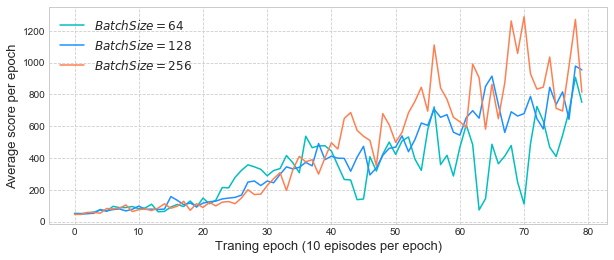

In [5]:
nrows = 800
batch1 = LogParser("../experiments/tune/batch_64.csv", nrows)
batch2 = LogParser("../experiments/tune/lr_2e-5.csv", nrows)
batch3 = LogParser("../experiments/tune/batch_256.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(batch1.avg_score(10), label=r'$Batch Size=64$', color='c')
plt.plot(batch2.avg_score(10), label=r'$Batch Size=128$', color='dodgerblue')
plt.plot(batch3.avg_score(10), label=r'$Batch Size=256$', color='coral')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("tune-lr.png", dpi=100)

In [6]:
df = pd.DataFrame(
    np.vstack((batch1.score, batch2.score, batch3.score)).T,
    columns = ['BatchSize=64', 'BatchSize=128', 'BatchSize=256']
)
df.describe()

,BatchSize=64,BatchSize=128,BatchSize=256
count,800.000000,800.000000,800.000000
mean,316.550000,388.453750,460.992500
std,295.435577,319.870418,433.063722
min,42.000000,43.000000,42.000000
25%,71.750000,99.000000,88.000000
50%,201.500000,312.500000,321.000000
75%,492.000000,619.000000,743.000000
max,1520.000000,1501.000000,2183.000000


## Batch Normalization

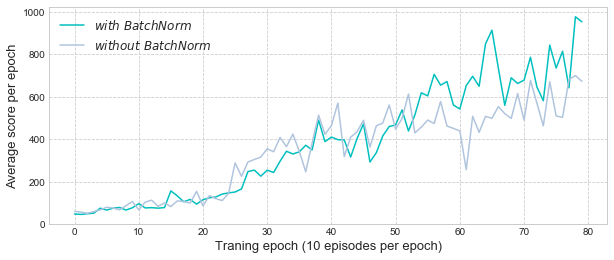

In [7]:
nrows = 800
bn = LogParser("../experiments/tune/lr_2e-5.csv", nrows)
wbn = LogParser("../experiments/tune/without_bn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(bn.avg_score(10), label=r'$with\,\,BatchNorm$', color='c')
plt.plot(wbn.avg_score(10), label=r'$without\,\,BatchNorm$', color='lightsteelblue')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("tune-bn.png", dpi=100)

In [8]:
df = pd.DataFrame(
    np.vstack((bn.score, wbn.score)).T,
    columns = ['WithBatchNorm', 'WithoutBatchNorm']
)
df.describe()

,WithBatchNorm,WithoutBatchNorm
count,800.000000,800.000000
mean,388.453750,347.673750
std,319.870418,248.551649
min,43.000000,43.000000
25%,99.000000,102.000000
50%,312.500000,324.000000
75%,619.000000,533.250000
max,1501.000000,1259.000000


# Epsilon

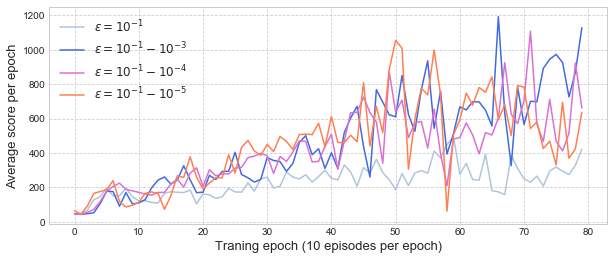

In [9]:
nrows = 800
# eps = LogParser("../experiments/tune/lr_2e-5.csv", nrows)
eps1 = LogParser("../experiments/tune/eps_1e-2.csv", nrows)
eps2 = LogParser("../experiments/tune/eps_1e-2_1e-3.csv", nrows)
eps3 = LogParser("../experiments/tune/eps_1e-2_1e-4.csv", nrows)
eps4 = LogParser("../experiments/tune/eps_1e-2_1e-5.csv", nrows)

plt.figure(figsize=(10, 4))
# plt.plot(eps.avg_score(10), label=r'$\epsilon=10^{-1}-10^{-4}$', color='c')
plt.plot(eps1.avg_score(10), label=r'$\epsilon=10^{-1}$', color='lightsteelblue')
plt.plot(eps2.avg_score(10), label=r'$\epsilon=10^{-1}-10^{-3}$', color='royalblue')
plt.plot(eps3.avg_score(10), label=r'$\epsilon=10^{-1}-10^{-4}$', color='orchid')
plt.plot(eps4.avg_score(10), label=r'$\epsilon=10^{-1}-10^{-5}$', color='coral')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("tune-eps.png", dpi=100)

In [10]:
df = pd.DataFrame(
    np.vstack((eps1.score, eps2.score, eps3.score, eps4.score)).T,
    columns = ['Epsilon=1e-1', 'Epsilon=1e-1 to 1e-3', 'Epsilon=1e-1 to 1e-4', 'Epsilon=1e-1 to 1e-5']
)
df.describe()

,Epsilon=1e-1,Epsilon=1e-1 to 1e-3,Epsilon=1e-1 to 1e-4,Epsilon=1e-1 to 1e-5
count,800.000000,800.000000,800.000000,800.000000
mean,234.276250,459.456250,419.427500,452.706250
std,169.061149,437.723698,338.219789,399.531497
min,42.000000,43.000000,43.000000,43.000000
25%,95.000000,152.750000,184.750000,122.750000
50%,191.500000,319.000000,335.000000,330.500000
75%,322.500000,661.000000,583.000000,713.500000
max,804.000000,4036.000000,2168.000000,2467.000000


## Explore Step

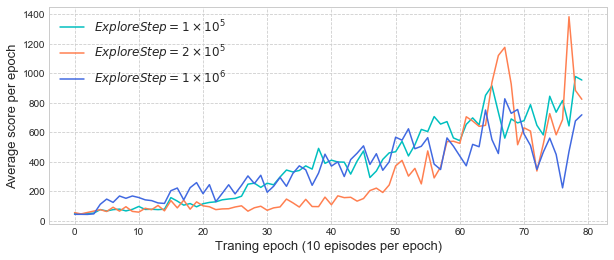

In [11]:
nrows = 800
explore1 = LogParser("../experiments/tune/lr_2e-5.csv", nrows)
explore2 = LogParser("../experiments/tune/explore_1e-2_1e-4_2e5.csv", nrows)
explore3 = LogParser("../experiments/tune/explore_1e-2_1e-4_1e6.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(explore1.avg_score(10), label=r'$ExploreStep=1\times 10^5$', color='c')
plt.plot(explore2.avg_score(10), label=r'$ExploreStep=2\times 10^5$', color='coral')
plt.plot(explore3.avg_score(10), label=r'$ExploreStep=1\times 10^6$', color='royalblue')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("tune-step.png", dpi=100)

In [12]:
df = pd.DataFrame(
    np.vstack((explore1.score, explore2.score, explore3.score)).T,
    columns = ['ExploreStep=1e5', 'ExploreStep=2e5', 'ExploreStep=1e6']
)
df.describe()

,ExploreStep=1e5,ExploreStep=2e5,ExploreStep=1e6
count,800.000000,800.000000,800.000000
mean,388.453750,303.842500,351.028750
std,319.870418,384.715554,283.749172
min,43.000000,43.000000,42.000000
25%,99.000000,61.000000,120.750000
50%,312.500000,125.500000,255.500000
75%,619.000000,379.000000,538.250000
max,1501.000000,2233.000000,1430.000000


## Gamma

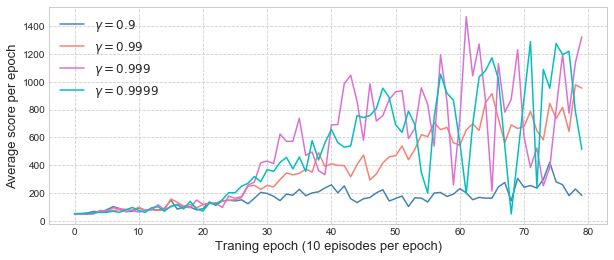

In [13]:
nrows = 800
gamma1 = LogParser("../experiments/tune/gamma_9e-1.csv", nrows)
gamma2 = LogParser("../experiments/tune/lr_2e-5.csv", nrows)
gamma3 = LogParser("../experiments/tune/gamma_999e-1.csv", nrows)
gamma4 = LogParser("../experiments/tune/gamma_9999e-1.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(gamma1.avg_score(10), label=r'$\gamma=0.9$', color='steelblue')
plt.plot(gamma2.avg_score(10), label=r'$\gamma=0.99$', color='salmon')
plt.plot(gamma3.avg_score(10), label=r'$\gamma=0.999$', color='orchid')
plt.plot(gamma4.avg_score(10), label=r'$\gamma=0.9999$', color='c')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("tune-gamma.png", dpi=100)

In [14]:
df = pd.DataFrame(
    np.vstack((gamma1.score, gamma2.score, gamma3.score, gamma4.score)).T,
    columns = ['Gamma=0.9', 'Gamma=0.99', 'Gamma=0.999', 'Gamma=0.9999']
)
df.describe()

,Gamma=0.9,Gamma=0.99,Gamma=0.999,Gamma=0.9999
count,800.000000,800.000000,800.00000,800.000000
mean,164.535000,388.453750,518.86125,478.758750
std,105.504373,319.870418,644.62895,511.098719
min,42.000000,43.000000,42.00000,43.000000
25%,74.750000,99.000000,69.00000,68.000000
50%,144.000000,312.500000,217.00000,254.000000
75%,236.250000,619.000000,785.50000,754.750000
max,618.000000,1501.000000,6403.00000,2971.000000


# Hyper Parameter Tuning

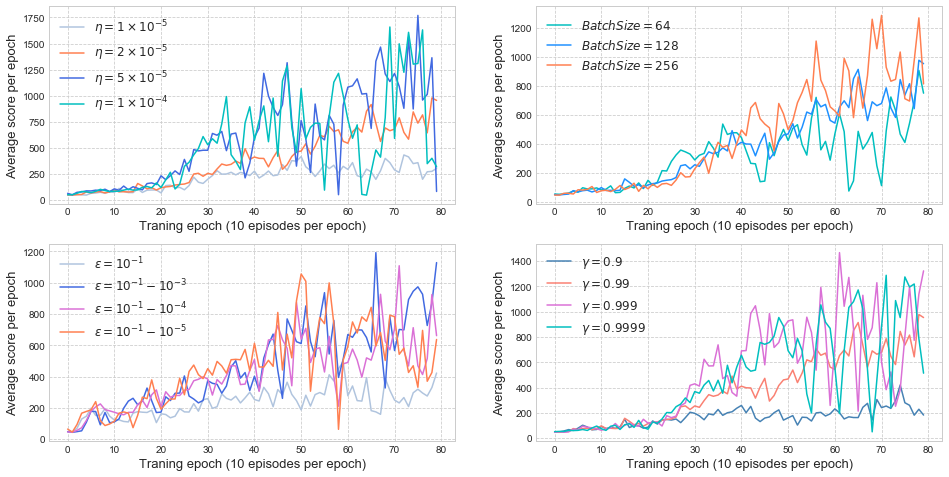

In [15]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.plot(lr1.avg_score(10), label=r'$\eta=1\times 10^{-5}$', color='lightsteelblue')
plt.plot(lr2.avg_score(10), label=r'$\eta=2\times 10^{-5}$', color='coral')
plt.plot(lr3.avg_score(10), label=r'$\eta=5\times 10^{-5}$', color='royalblue')
plt.plot(lr4.avg_score(10), label=r'$\eta=1\times 10^{-4}$', color='c')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(222)
plt.plot(batch1.avg_score(10), label=r'$Batch Size=64$', color='c')
plt.plot(batch2.avg_score(10), label=r'$Batch Size=128$', color='dodgerblue')
plt.plot(batch3.avg_score(10), label=r'$Batch Size=256$', color='coral')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(223)
plt.plot(eps1.avg_score(10), label=r'$\epsilon=10^{-1}$', color='lightsteelblue')
plt.plot(eps2.avg_score(10), label=r'$\epsilon=10^{-1}-10^{-3}$', color='royalblue')
plt.plot(eps3.avg_score(10), label=r'$\epsilon=10^{-1}-10^{-4}$', color='orchid')
plt.plot(eps4.avg_score(10), label=r'$\epsilon=10^{-1}-10^{-5}$', color='coral')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(224)
plt.plot(gamma1.avg_score(10), label=r'$\gamma=0.9$', color='steelblue')
plt.plot(gamma2.avg_score(10), label=r'$\gamma=0.99$', color='salmon')
plt.plot(gamma3.avg_score(10), label=r'$\gamma=0.999$', color='orchid')
plt.plot(gamma4.avg_score(10), label=r'$\gamma=0.9999$', color='c')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("param-tune.png", dpi=100)

## DQN

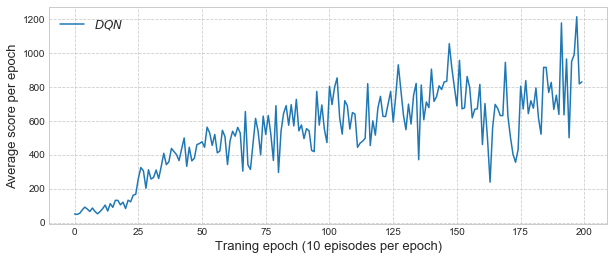

In [16]:
nrows = 2e3
dqn = LogParser("../experiments/dqn.csv", nrows)
# dqn_bn = LogParser("../experiments/dqn_bn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
# plt.plot(dqn_bn.avg_score(10), label=r'$DQN\,\,with\,\,BN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-dqn.png", dpi=100)

## Double DQN

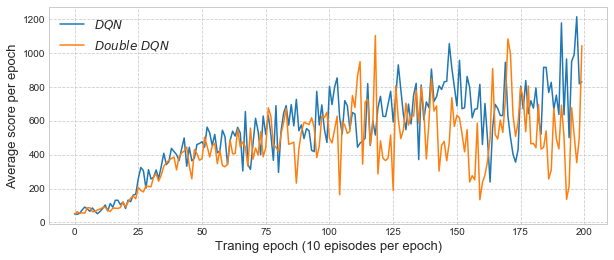

In [17]:
nrows = 2e3
# dqn = LogParser("../experiments/dqn.csv", nrows)
double_dqn = LogParser("../experiments/double_dqn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(double_dqn.avg_score(10), label=r'$Double\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-double-dqn.png", dpi=100)

## Dueling DQN

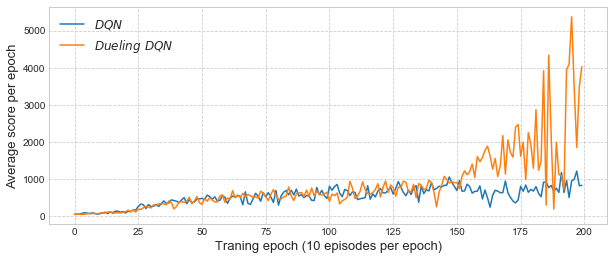

In [18]:
nrows = 2e3
# dqn = LogParser("../experiments/dqn.csv", nrows)
duel_dqn = LogParser("../experiments/duel_dqn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(duel_dqn.avg_score(10), label=r'$Dueling\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-duel-dqn.png", dpi=100)

## DQN with PER

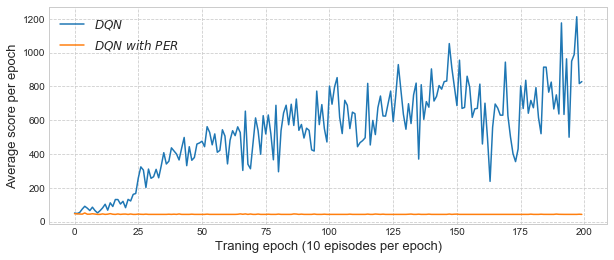

In [19]:
nrows = 2e3
# dqn = LogParser("../experiments/dqn.csv", nrows)
dqn_per = LogParser("../experiments/dqn_per.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(dqn_per.avg_score(10), label=r'$DQN\,\,with\,\,PER$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-dqn-per.png", dpi=100)

## DQN with BN

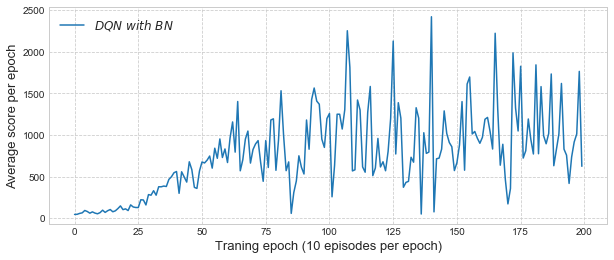

In [20]:
nrows = 2e3
dqn_bn = LogParser("../experiments/dqn_bn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn_bn.avg_score(10), label=r"$DQN\,\,with\,\,BN$")
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-dqn-bn.png", dpi=100)

## Double DQN with BN

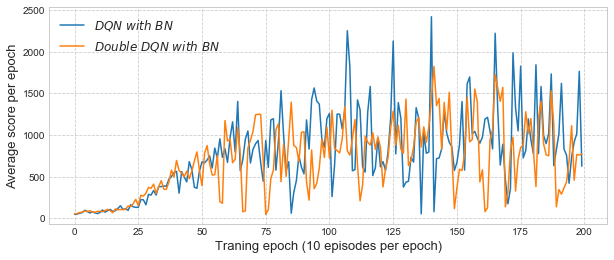

In [21]:
nrows = 2e3
# dqn_bn = LogParser("../experiments/dqn_bn.csv", nrows).avg_score(10)
double_dqn_bn = LogParser("../experiments/double_dqn_bn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn_bn.avg_score(10), label=r"$DQN\,\,with\,\,BN$")
plt.plot(double_dqn_bn.avg_score(10), label=r"$Double\,\,DQN\,\,with\,\,BN$")
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-double-dqn-bn.png", dpi=100)

## Dueling DQN with BN

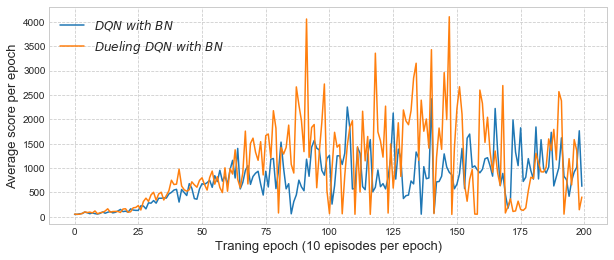

In [22]:
nrows = 2e3
# dqn_bn = LogParser("../experiments/dqn_bn.csv", nrows)
duel_dqn_bn = LogParser("../experiments/duel_dqn_bn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn_bn.avg_score(10), label=r"$DQN\,\,with\,\,BN$")
plt.plot(duel_dqn_bn.avg_score(10), label=r"$Dueling\,\,DQN\,\,with\,\,BN$")
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-duel-dqn-bn.png", dpi=100)

## DQN with PER and BN

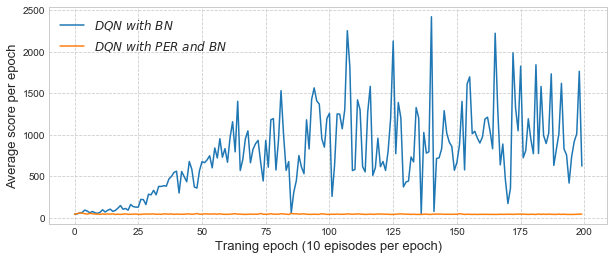

In [23]:
nrows = 2e3
# dqn_bn = LogParser("../experiments/dqn_bn.csv", nrows)
dqn_per_bn = LogParser("../experiments/dqn_per_bn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn_bn.avg_score(10), label=r"$DQN\,\,with\,\,BN$")
plt.plot(dqn_per_bn.avg_score(10), label=r"$DQN\,\,with\,\,PER\,\,and\,\,BN$")
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-dqn-per-bn.png", dpi=100)

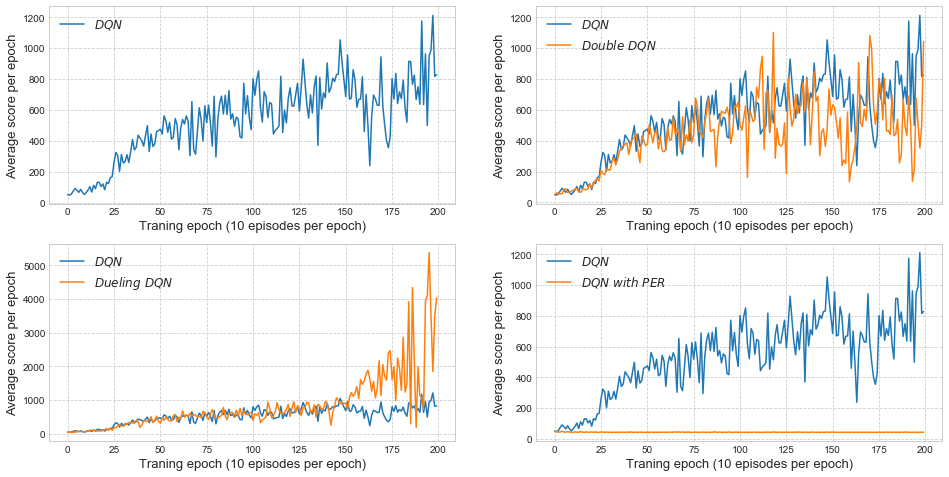

In [24]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(222)
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(double_dqn.avg_score(10), label=r'$Double\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(223)
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(duel_dqn.avg_score(10), label=r'$Dueling\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(224)
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(dqn_per.avg_score(10), label=r'$DQN\,\,with\,\,PER$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
plt.savefig("exp-train.png", dpi=100)

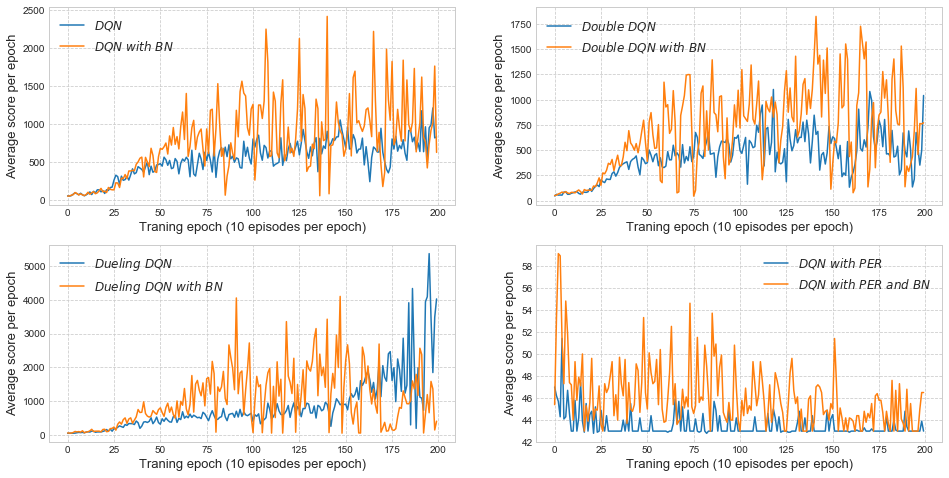

In [25]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(dqn_bn.avg_score(10), label=r"$DQN\,\,with\,\,BN$")
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(222)
plt.plot(double_dqn.avg_score(10), label=r'$Double\,\,DQN$')
plt.plot(double_dqn_bn.avg_score(10), label=r"$Double\,\,DQN\,\,with\,\,BN$")
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(223)
plt.plot(duel_dqn.avg_score(10), label=r'$Dueling\,\,DQN$')
plt.plot(duel_dqn_bn.avg_score(10), label=r"$Dueling\,\,DQN\,\,with\,\,BN$")
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

plt.subplot(224)
plt.plot(dqn_per.avg_score(10), label=r'$DQN\,\,with\,\,PER$')
plt.plot(dqn_per_bn.avg_score(10), label=r'$DQN\,\,with\,\,PER\,\,and\,\,BN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
plt.savefig("exp-train-bn.png", dpi=100)

In [26]:
mapping = {
    "DQN": "../tests/dqn.csv",
    "Double DQN": "../tests/double_dqn.csv",
    "Dueling DQN": "../tests/duel_dqn.csv",
    "DQN with PER": "../tests/dqn_per.csv",
    "DQN (BN)": "../tests/dqn_bn.csv",
    "Double DQN (BN)": "../tests/double_dqn_bn.csv",
    "Dueling DQN (BN)": "../tests/duel_dqn_bn.csv",
    "DQN with PER (BN)": "../tests/dqn_per_bn.csv"
}

# initialize with human results
scores = [
    529,569,1536,638,1674,1681,850,840,1267,1801,
    691,552,603,1513,755,1204,894,767,956,1002,
    1549,1135,2029,268,983,2384,857,1367,1495,1268
]
names = ["Human"] * 30
res = pd.DataFrame({"score": scores}).describe()
for k, v in mapping.items():
    temp = pd.read_csv(v, nrows=30)
    scores.extend(temp.score.values.tolist())
    names.extend([k] * 30)
    res = pd.concat([res, temp.describe().score], axis=1)
df = pd.DataFrame({"score": scores, "id": names})
res.columns = [
    "Human", "DQN", "Double DQN", "Dueling DQN", 
    "DQN with PER",  "DQN with BN", "Double DQN with BN", 
    "Dueling DQN with BN", "DQN with PER and BN"
]

In [27]:
res.T[['mean', 'std', 'min', 'max', '25%', '50%', '75%', ]]

,mean,std,min,max,25%,50%,75%
Human,1121.900000,499.905946,268.0,2384.0,758.00,992.5,1508.50
DQN,1161.300000,814.357633,45.0,3142.0,321.50,1277.0,1729.50
Double DQN,340.933333,251.401305,43.0,942.0,178.75,259.5,400.75
Dueling DQN,2383.033333,2703.641025,44.0,8943.0,534.75,1499.5,2961.00
DQN with PER,43.300000,1.643168,43.0,52.0,43.00,43.0,43.00
DQN with BN,2119.466667,1595.485587,44.0,5823.0,1218.75,1909.5,2979.75
Double DQN with BN,382.166667,188.740304,43.0,738.0,283.75,356.0,525.50
Dueling DQN with BN,2083.366667,1441.494997,213.0,5389.0,1142.50,1912.5,2659.75
DQN with PER and BN,45.433333,7.379764,43.0,78.0,43.00,43.0,43.00


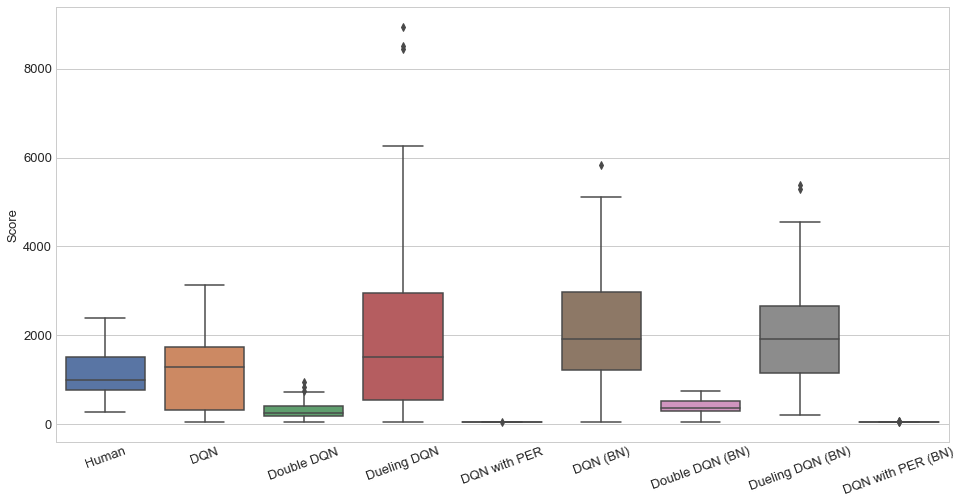

In [28]:
plt.figure(figsize=(16, 8))
sns.set(font_scale=1.25)
plt.style.use("seaborn-whitegrid")
sns.boxplot(x=df['id'], y=df['score'])
plt.xlabel("")
plt.xticks(rotation=20, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Score", fontsize=13)
plt.savefig("exp-test.png", dpi=100)